In [2]:
import os
import sys

import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.1'

In [3]:
keras.__version__

'2.4.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [125]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [126]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [127]:
model.layers

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [129]:
hidden1 = model.layers[1]

In [130]:
weights, biases = hidden1.get_weights()

In [131]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [132]:
biases.shape

(300,)

In [133]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [134]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8317 - val_loss: 0.4350 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8456 - val_loss: 0.5355 - val_accuracy: 0.7970
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3919 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3937 - accuracy: 0.8618 - val_loss: 0.3741 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3750 - accuracy: 0.8675 - val_loss: 0.3720 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3614 - val_accuracy:

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Binary classification

In [81]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [82]:
y_train_full = y_train_full == 5
y_test = y_test == 5

In [83]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [84]:
model_binary = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [86]:
model_binary.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05),
              metrics=['accuracy', keras.metrics.FalseNegatives()])

In [102]:
history = model_binary.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    class_weight={
                        5: 10,
                    }\
            .update({k:1 for k in [0, 1, 2, 3, 4, 6, 7, 8, 9]}))

Epoch 1/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9749 - false_negatives_2: 1083.0000 - val_loss: 0.0473 - val_accuracy: 0.9844 - val_false_negatives_2: 74.0000
Epoch 2/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0368 - accuracy: 0.9876 - false_negatives_2: 413.0000 - val_loss: 0.0236 - val_accuracy: 0.9920 - val_false_negatives_2: 26.0000
Epoch 3/3
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9897 - false_negatives_2: 330.0000 - val_loss: 0.0480 - val_accuracy: 0.9796 - val_false_negatives_2: 6.0000


In [110]:
import pandas as pd

(0, 1)

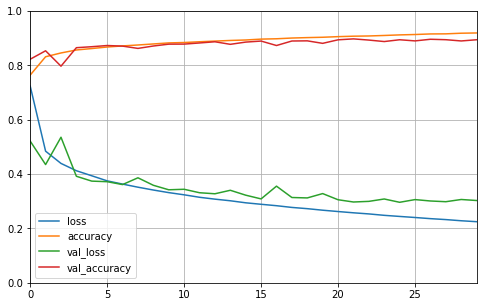

In [140]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [142]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8825


[0.33723148703575134, 0.8824999928474426]

In [146]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [156]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1])

In [159]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Regression

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [164]:
np.random.seed(42)
tf.random.set_seed(42)

In [167]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 853us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 955us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 871us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 845us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 848us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4875 - val_lo

In [168]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 678us/step - loss: 0.4212


(0, 1)

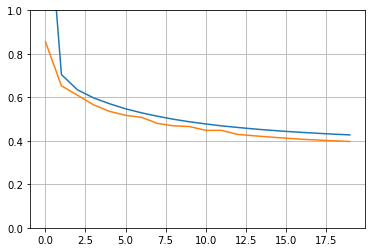

In [174]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)

## Functional API

In [175]:
np.random.seed(42)
tf.random.set_seed(42)

In [180]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [181]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_6[0][0]         

In [178]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 988us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4659 - val_loss: 0.43

In [179]:
mse = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 772us/step - loss: 0.4032


### Multiple inputs

In [184]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden1, input_A])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [187]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B), y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.9453 - val_loss: 0.9559
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7926 - val_loss: 0.7328
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7005 - val_loss: 0.6571
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6515 - val_loss: 0.6140
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6146 - val_loss: 0.5787
Epoch 6/20
363/363 [==============================] - 0s 971us/step - loss: 0.5853 - val_loss: 0.5491
Epoch 7/20
363/363 [==============================] - 0s 825us/step - loss: 0.5616 - val_loss: 0.5230
Epoch 8/20
363/363 [==============================] - 0s 830us/step - loss: 0.5422 - val_loss: 0.5069
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5251 - val_loss: 0.4930
Epoch 10/20
363/363 [==============================] - 0s 759us/step - loss: 0.5107 - val_loss

In [188]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 781us/step - loss: 0.4465


## Multiple outputs

In [191]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden1, input_A])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden1)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [195]:
model.compile(loss='mse', loss_weights=[0.9, 0.1], optimizer='sgd')

In [197]:
model.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=20,
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid]
    )
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1593 - main_output_loss: 0.9491 - aux_output_loss: 3.0510 - val_loss: 3.5386 - val_main_output_loss: 3.7593 - val_aux_output_loss: 1.5526
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6755 - main_output_loss: 0.6054 - aux_output_loss: 1.3067 - val_loss: 13.9559 - val_main_output_loss: 15.3744 - val_aux_output_loss: 1.1886
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6856 - main_output_loss: 0.6385 - aux_output_loss: 1.1095 - val_loss: 1.5689 - val_main_output_loss: 1.3703 - val_aux_output_loss: 3.3563
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5077 - main_output_loss: 0.4550 - aux_output_loss: 0.9825 - val_loss: 0.5248 - val_main_output_loss: 0.4190 - val_aux_output_loss: 1.4774
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4787 - main_output_loss: 0.4344 - aux_output_loss: 0.8771 - val_lo

In [198]:
total_loss, main_loss, aux_loss = model.evaluate(
    (X_test_A, X_test_B), (y_test, y_test)
)

162/162 [==============================] - 0s 837us/step - loss: 0.4077 - main_output_loss: 0.3890 - aux_output_loss: 0.5757


## The subclassing API

In [199]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [200]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.6575 - output_1_loss: 2.4589 - output_2_loss: 4.4454 - val_loss: 1.4307 - val_output_1_loss: 1.1811 - val_output_2_loss: 3.6776
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.0179 - output_1_loss: 0.7781 - output_2_loss: 3.1764 - val_loss: 0.9831 - val_output_1_loss: 0.8103 - val_output_2_loss: 2.5383
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8396 - output_1_loss: 0.6824 - output_2_loss: 2.2551 - val_loss: 0.7950 - val_output_1_loss: 0.6620 - val_output_2_loss: 1.9921
Epoch 4/10
363/363 [==============================] - 0s 951us/step - loss: 0.7484 - output_1_loss: 0.6358 - output_2_loss: 1.7611 - val_loss: 0.7213 - val_output_1_loss: 0.6095 - val_output_2_loss: 1.7268
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6926 - output_1_loss: 0.6030 - output_2_loss: 1.4994 - val_loss: 0.6646 - val_output_1_loss: 0.5634 - val_

## Callbacks

In [201]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [202]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [205]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 937us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 992us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 967us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 926us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 906us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 868us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 934us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 631us/step - loss: 0.4382


In [210]:
class PrintValTrainRationCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [211]:
val_train_ratio_cb = PrintValTrainRationCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

351/363 [============================>.] - ETA: 0s - loss: 0.4298
val/train: 0.94
363/363 [==============================] - 0s 913us/step - loss: 0.4318 - val_loss: 0.4049


## Tensorboard

In [44]:
root_logdir = os.path.join(os.curdir, 'my_logs')

In [49]:
def get_run_logdir(**kwargs):
    import time
    print(kwargs)
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    
    if len(kwargs) > 0:
        run_id += '?'
        
    for key, value in kwargs.items():
        run_id += '_{}={}'.format(key, str(value))
        
        
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir(lr=0.05)
run_logdir

{'lr': 0.05}


'./my_logs/run_2020_10_21-11_49_06?_lr=0.05'

In [50]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [52]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb, checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 993us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 958us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 965us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 950us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 987us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 936us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 917us/step - loss: 0.4474 - va

## Hyperparamaeter Tuning

In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [61]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [62]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 959us/step - loss: 1.1971 - val_loss: 1.7696
Epoch 2/100
363/363 [==============================] - 0s 916us/step - loss: 0.6045 - val_loss: 0.5361
Epoch 3/100
363/363 [==============================] - 0s 869us/step - loss: 0.5203 - val_loss: 0.5093
Epoch 4/100
363/363 [==============================] - 0s 862us/step - loss: 0.4783 - val_loss: 0.4392
Epoch 5/100
363/363 [==============================] - 0s 862us/step - loss: 0.4524 - val_loss: 0.4161
Epoch 6/100
363/363 [==============================] - 0s 794us/step - loss: 0.4353 - val_loss: 0.4036
Epoch 7/100
363/363 [==============================] - 0s 790us/step - loss: 0.4249 - val_loss: 0.3930
Epoch 8/100
363/363 [==============================] - 0s 958us/step - loss: 0.4174 - val_loss: 0.3925
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4104 - val_loss: 0.3853
Epoch 10/100
363/363 [==============================] - 0s 899us/step - los

In [66]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnn_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [71]:
def gcd(a, b):
    while b > 0:
        a, b = b, a % b
    return a

def lcm(a, b):
    return a * b // gcd(a, b)     # integer division


d = 1
for i in range(1, 10): #last i=20
    d = lcm(d, 20)

In [72]:
gcd(255, 6)

3